In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

[ 1.59327362  0.5687224  -0.11448705]
(1000, 3)
(1000, 3)
(1000, 3)
(1000,)
Number of feature appearances:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5, 0, 'Value')

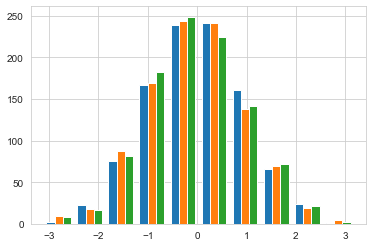

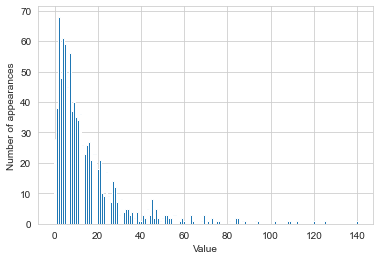

In [2]:
# 説明用のデータ生成
rnd = np.random.RandomState(0)
X_org = rnd.normal(size =(1000,3))
w = rnd.normal(size = 3)
plt.figure()
plt.hist(X_org)
print(w)

print(X_org.shape)
print((10 * np.exp(X_org)).shape)
X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)
print(X.shape)
print(y.shape)

print(f"Number of feature appearances:\n{np.bincount(X[:,0])}")

plt.figure()
bins = np.bincount(X[:,0])
plt.bar(range(len(bins)), bins)
plt.ylabel("Number of appearances")
plt.xlabel("Value")

0.6224186236310756
0.8749342372887815


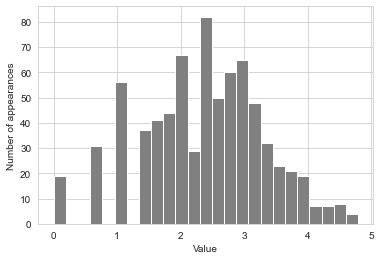

In [3]:
# 決定木ベースのモデルと異なり、線形モデルやニューラルネットワークモデルは、特徴量とターゲットに非線形関係があると、モデリングが難しくなる
# ほとんどのモデルは、ここの特徴量が（回帰の場合には出力も）、おおよそガウス分布に従っているときに最もうまく機能する
# logやexpによる変化は小手先の技ではあるが、これを実現する簡単で効果的な方法である
# このような変換が特に有効なよくあるケースは、整数のカウントデータを扱う場合だ
# （上記最下のグラフのような）この種の分布（小さい値が多く、まれにとても大きな値がある）は実データには非常によく出現する
# しかし、このようなデータは多くの線形モデルではうまく扱えないが、下記例では対数変換を行うと、性能がはるかによくなった
# この種の変換は決定木ベースのモデルには関係ないが、線形モデルにとっては本質的である
# 回帰モデルの場合は、ターゲット変数yも変換した方がよい場合もある
# カウントデータ（例えば注文数など）の予測は一般的なタスクだが、log(y+1)で変換するとうまくいくことも多い
# SVM、最近棒法、ニューラルネットワークは、ビニング、多項式、交互作用の恩恵を受けることがあるが、線形モデルの場合ほど大きなものでない
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print(score)

# データに0値があるので（そして対数は0に対して定義できないので）、 + 1 をしている
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

plt.hist(X_train_log[:,0], bins = 25, color = "gray")
plt.ylabel("Number of appearances")
plt.xlabel("Value")

score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print(score)